In this Task we will predict the percentage of marks that a student is expected to score based on the No.of Hours he studied. This is just simple LinearRegression algorithm related Task.
There are only 2 columns in the given Dataset.

# Import required Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Given Data-set

In [2]:
df = pd.read_csv('K:\\machine learning\\sparks foundation internship\\marks_prediction.csv')
print(df.head())
print(df.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25, 2)


There is no any null value is present.

# Plotting Distribution of score

Here we plotting the distribution of score using matplotlib library

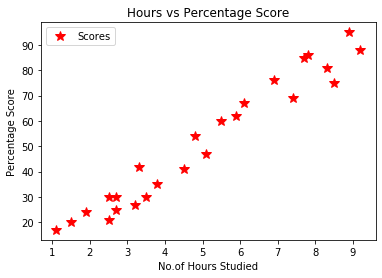

In [3]:
df.plot(x='Hours',y='Scores',style='*',color='r',markersize=10)
plt.title('Hours vs Percentage Score')
plt.xlabel('No.of Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

from above plotting we see that there is a positive linear regression between the number of Hours studied and Percentage of Score

# Preparing the Data

Here we divide our main dataset into 'inputs' and 'final output' or which we want to predict

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Next step is that we want to split our Dataset into Train and Test. 
out of 100% data we give 20% data for Testing and 80% for training our ML Model
by using scikit-learn's 'train_test_split' method

In [5]:
#here we import that library which we required for splitting Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


# Training Model

after completing splitting the dataset into train and test now we train our model

for training our model we use LinearRegression Algorithm

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Training Complete

# Plotting Regression Line

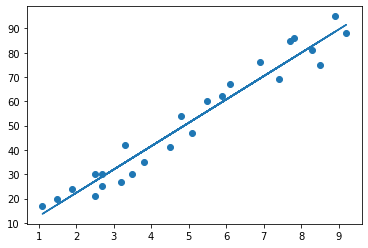

In [7]:
reg_line = lr.coef_* X + lr.intercept_
#plotting for testing data
plt.scatter(X,y)
plt.plot(X,reg_line);
plt.show()

# Now make Predictions

In [8]:
y_pred = lr.predict(X_test)

here we compare original and predicted values

In [9]:
df1 = pd.DataFrame({'original':y_test,'Predicted':y_pred})
df1

,original,Predicted
0,69,74.174939
1,67,61.688457
2,27,33.833997
3,85,77.056435
4,54,49.201975


# Evaluating Model

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('root mean squared error =',rmse)
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

root mean squared error = 6.1289030486308045
Mean Absolute Error: 6.012413762390567


In [11]:
print('accuracy_score =',lr.score(X_test,y_test))

accuracy_score = 0.9000546706590146


Here our model has 90% accuracy 

Task: What will be predicted score if a student studies for 9.25 hrs/ day?

In [12]:
no_of_Hours = 9.25
task_prediction = lr.predict([[no_of_Hours]])
print('Task Prediction Result =',task_prediction)

Task Prediction Result = [91.94416405]


if Students Studied for 9.25 Hours per day then he scored 91.944%